In [2]:
%load_ext autoreload
%autoreload 2

import os
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
import chromATAC as ca
from chromATAC.integrated import IntData
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.gridspec as gridspec
import warnings

from chromATAC.integrated import intersect_beds, intersect_datasets

parent = '/Users/mossishahi/Code/lupien/IntData/data/'
os.chdir(parent)

cote_df = './V2-TEs/CoTEs/'
te_ds = './V2-TEs/TEs/'
tcga_ds = './TCGA/filtered_clustered/TCGA-GBM/'

def element_to_chr_collision(x, leng_normalized=True):
    big_dict = {c:0 for c in ca.info.CHROMOSOMES['names']}
    for (c, st, en, sg) in x:
        if c in big_dict:
            big_dict[c] += (int(en)-int(st))*int(sg)/ca.info.CHROMOSOMES['lens'][c] if leng_normalized else int(sg)
    return big_dict

def chr_to_genome_collision(input):
    return sum(list(input.values()))

In [8]:
%%time
df = intersect_datasets(te_ds, tcga_ds, signal_column_index_1=3, signal_column_index_2=4)
dff = pd.DataFrame.from_dict(df)
dfs = dff.apply(lambda x: x.apply(lambda y: element_to_chr_collision(y)))
d = dfs.apply(lambda x: x.apply(lambda x: sum(x.values())))
dfs.to_csv('./te_chr_level_collision.csv', sep='\t')
d.to_csv('./te_genome_level_collision.csv', sep='\t')

  0%|                                                                                                                               | 0/971 [00:00<?, ?it/s]***** WARNING: File ./TCGA/filtered_clustered/TCGA-GBM/32f2dc09-8375-4d10-b11b-af9eb654442d_peaks.narrowPeak.bed has inconsistent naming convention for record:
chr1	9976	10530	32f2dc09-8375-4d10-b11b-af9eb654442d_peak_3a	501	.	14.82897	2.00979e-53	50.18058	122

***** WARNING: File ./TCGA/filtered_clustered/TCGA-GBM/32f2dc09-8375-4d10-b11b-af9eb654442d_peaks.narrowPeak.bed has inconsistent naming convention for record:
chr1	9976	10530	32f2dc09-8375-4d10-b11b-af9eb654442d_peak_3a	501	.	14.82897	2.00979e-53	50.18058	122

***** WARNING: File ./TCGA/filtered_clustered/TCGA-GBM/9d3eb297-4589-4e37-a6a6-4c0fccb013e1_peaks.narrowPeak.bed has inconsistent naming convention for record:
chr1	9976	10517	9d3eb297-4589-4e37-a6a6-4c0fccb013e1_peak_2a	268	.	9.54445	7.83971e-30	26.83091	114

***** WARNING: File ./TCGA/filtered_clustered/TCGA-GBM/9d3e

CPU times: user 2h 46min 33s, sys: 1min 46s, total: 2h 48min 20s
Wall time: 3h 13min 15s


In [4]:
df = pd.read_csv('./te_genome_level_collision.csv', sep='\t')

In [5]:
df.rename({'Unnamed: 0':'sample'}, inplace=True, axis=1)

In [6]:
df.set_index('sample', inplace=True)

In [7]:
df

,1142_MIRc_Merged,1193_MLT1O_Merged,125_AluYj4_Merged,515_Kanga2_a_Merged,1109_MER87_Merged,480_HERVH-int_Merged,1542_Zaphod2_Merged,586_L1ME3D_Merged,916_MER101B_Merged,963_MER31A_Merged,...,578_L1ME1_Merged,513_Kanga1c_Merged,1026_MER52-int_Merged,856_LTR82A_Merged,305_Charlie22a_Merged,651_L4_C_Mam_Merged,372_ERVL-B4-int_Merged,517_L1M1_Merged,871_LTR88b_Merged,1367_THE1D-int_Merged
sample,,,,,,,,,,,,,,,,,,,,,
44cef674-d3d8-4456-ba6c-6289e789afb1_peaks,0.373568,0.010747,0.005149,0.001925,0.000595,0.011598,0.000760,0.006921,0.000650,0.011779,...,0.055314,0.002254,0.000101,0.002323,0.001930,0.013139,0.013763,0.063720,0.005710,0.001644
32f2dc09-8375-4d10-b11b-af9eb654442d_peaks,0.888129,0.028845,0.009884,0.003146,0.000304,0.064695,0.001439,0.015575,0.001302,0.081923,...,0.118937,0.001734,0.002270,0.003481,0.005593,0.029371,0.038658,0.100471,0.011770,0.002286
9d3eb297-4589-4e37-a6a6-4c0fccb013e1_peaks,0.875572,0.022356,0.019449,0.017418,0.000616,0.009345,0.002680,0.014885,0.001980,0.025700,...,0.129148,0.003039,0.009765,0.011999,0.006339,0.025525,0.023574,0.173402,0.017324,0.002938
3460368d-1e2c-4bfc-bb16-93ea169b1517_peaks,1.899946,0.054213,0.035470,0.014667,0.002197,0.035120,0.007060,0.052121,0.007098,0.027854,...,0.367081,0.007094,0.003070,0.026051,0.005963,0.065959,0.173706,0.441142,0.019804,0.010140
e8bac043-0df7-4a77-9e01-a22788f49f4b_peaks,0.326742,0.006511,0.005729,0.002898,0.000000,0.001852,0.000594,0.008616,0.000000,0.005176,...,0.030531,0.000149,0.000461,0.002161,0.000489,0.007849,0.011135,0.060669,0.006439,0.002306
2c58ca18-3a80-42ee-8a07-0a0d43695751_peaks,1.167713,0.053808,0.052105,0.004598,0.001234,0.075686,0.005678,0.031241,0.015329,0.066695,...,0.260019,0.004919,0.031262,0.009104,0.004910,0.041850,0.106823,0.346014,0.021198,0.011256
c815b458-a6cc-4da2-9b3c-ee62f051f671_peaks,1.319057,0.047728,0.025373,0.011396,0.000876,0.013969,0.002259,0.026102,0.002035,0.031596,...,0.194343,0.001998,0.014689,0.017545,0.012405,0.040345,0.063590,0.793826,0.028194,0.063068
63a1391d-dbd7-4b0b-8e9b-348ac1f18ba3_peaks,0.833851,0.022759,0.015949,0.005281,0.000324,0.006258,0.001407,0.010231,0.000653,0.059914,...,0.145529,0.005305,0.004297,0.005319,0.004715,0.027745,0.033428,0.128763,0.022090,0.004018
9123cfa4-442c-4dc8-a0ff-5837fd931058_peaks,0.956878,0.021729,0.018065,0.002055,0.000399,0.031207,0.002246,0.022811,0.000614,0.038679,...,0.180440,0.002681,0.000393,0.012293,0.005597,0.023274,0.018128,0.099282,0.018818,0.001141


In [27]:
df.mean(0).sort_values(ascending=False)

1140_MIRb_Merged         2.322593
643_L2a_Merged           1.921888
101_AluSx1_Merged        1.781057
1141_MIR_Merged          1.711521
104_AluSx_Merged         1.530195
                           ...   
1077_MER68C_Merged       0.000079
1368_THE1-int_Merged     0.000076
639_L1P_Merged           0.000071
725_LTR22_Merged         0.000021
1238_Ricksha_b_Merged    0.000010
Length: 971, dtype: float64

<Axes: >

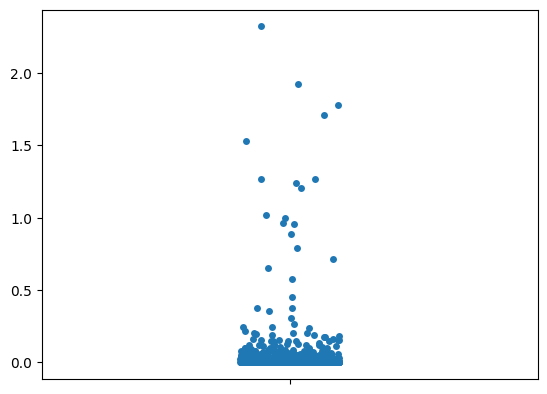

In [24]:
sns.stripplot(df.mean(0))